In [1]:
import glob
import cv2
import matplotlib.pyplot as plt
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

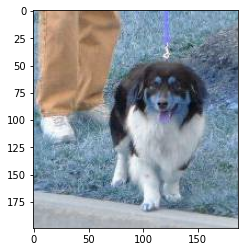

(199, 187, 3)

In [2]:
file_name = r"C:\Users\Admin\Downloads\archive (1)\train\dogs\dog.2.jpg"
image = cv2.imread(file_name)
plt.imshow(image)
plt.show()
image.shape

In [3]:
#for deeplearning and image processing tensorflow and Keras are used
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [4]:
print(tensorflow.__version__)

2.10.0


In [5]:
#designing Modeling 
#initiAlize the parameter 
img_width , img_height = 150 , 150
train_data_dir = r"C:\Users\Admin\Downloads\archive (1)\train"
validation_data_dir = r"C:\Users\Admin\Downloads\archive (1)\test"
nb_train_simple = 100
nb_validation_simples = 100
epochs = 20
batch_size = 20

In [6]:
import tensorflow.keras.backend as k

In [7]:
if k.image_data_format == 'Channels_First':
    input_shape = (3,img_width,img_height)
else :
    input_shape = (img_width,img_height,3)

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
"""#to normalize the images I give rescale = 1./255 ,horizital_range=0.2 
and zoom_range=0.2 by this some images are zoom and some rotate """
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width,img_height), batch_size=batch_size, class_mode='binary', classes=['cats','dogs'])
"""now here, this will generate trainING generator data
target_size mension img_width, img_height 
batch_size is 20 already mension 
class mode is binary b/c only two classes are there be classify """
validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width,img_height), batch_size=batch_size, class_mode='binary', )
"""now here, this will generate testing generator data
target_size mension img_width, img_height 
batch_size is 20 already mension 
class mode is binary b/c only two classes are there be classify """


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


'now here, this will generate testing generator data\ntarget_size mension img_width, img_height \nbatch_size is 20 already mension \nclass mode is binary b/c only two classes are there be classify '

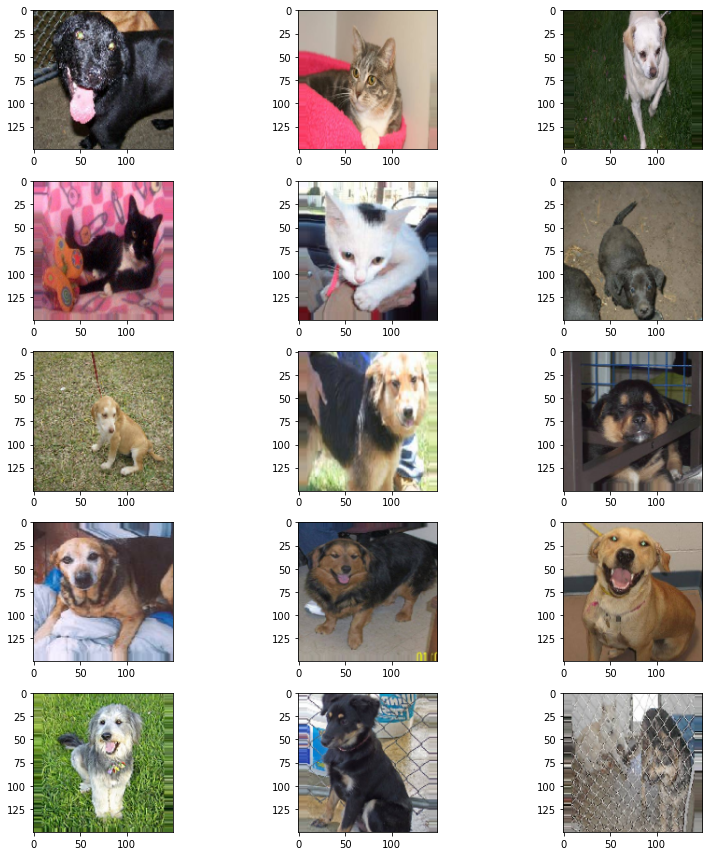

In [9]:
#now I want to see what my data generator done
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [10]:
model = Sequential()# it workING rule 1 by 1
#1st layer is convolution layer so we are adding that 
model.add(Conv2D(64,(3*3), input_shape = input_shape) )#64 neurons with 3*3 filter
#this class allow to create convolution neural network to extract the features from the image 

model.add(Activation('relu'))#we use it to convert negative numbers into 0
model.add(MaxPooling2D(pool_size=(2,2)))#it reduce the image size 

model.add(Flatten())#it convert multiple dimensions into 1D arrayor channel 
model.add(Dense(64))#it is a fully contacted data, 64 neural network with 3*3 filter

#adding some layers again to get the accuracy higher
#numbers of output node in hidden layer
model.add(Activation('relu'))#we use it to convert negative numbers into 0
model.add(Dense(1))#output layer
model.add(Activation('sigmoid'))
"""sigmoid is activation method. the output always in probability format not a proper number 0 or 1.
if the number near to 0 means it is not a image or if the number near to 1 so it is a image   b/c it gives """
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 64)      15616     
                                                                 
 activation (Activation)     (None, 142, 142, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 322624)            0         
                                                                 
 dense (Dense)               (None, 64)                20648000  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [11]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
model.summary()
"""it might be possible that ur data not right so, in that case optimizer help to understand optimizing our model
"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 142, 142, 64)      15616     
                                                                 
 activation (Activation)     (None, 142, 142, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 322624)            0         
                                                                 
 dense (Dense)               (None, 64)                20648000  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

'it might be possible that ur data not right so, in that case optimizer help to understand optimizing our model\n'

In [ ]:
#the model is actually compIle through above line of code
# I am going to train my model 
# the fit_generator fit the model on data yeided batch by batch by python generator 
training = model.fit_generator(train_generator,
                           steps_per_epoch = nb_train_simple,epochs = epochs,
                           validation_data = validation_generator,
                            validation_steps = nb_validation_simples)
# I am not running this here b/c it take much time and memory 

In [ ]:
#list all the data in train 
print(training.histroy.keys())
plt.plot(training.histroy['accuracy'])
plt.plot(training.histroy['val_accuracy'])
plt.title('accuracy curve model')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

In [ ]:
#train for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('loss model')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

In [16]:
def show_img(path):
    file_name = path
    image = cv2.imread(file_name)
    plt.imshow(image)
    plt.show()
    image.shape

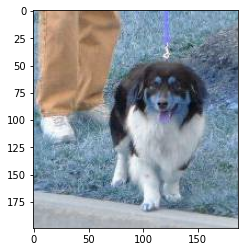

In [17]:
show_img(r"C:\Users\Admin\Downloads\archive (1)\train\dogs\dog.2.jpg")

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np 
def get_imd_pred(path):
    ing_pred = image.load_img(path,target_size=(150,150))
    ing_pred = image.img_to_array(ing_pred)
    ing_pred = np.expand_dims(ing_pred, axis=0)
    result = model.predict(ing_pred)
    if result[0][0] == 1:
        prediction = "Dog"
    else:
        prediction = "cat"
    print("prediction" ,prediction)

In [20]:
get_imd_pred(r"C:\Users\Admin\Downloads\archive (1)\train\dogs\dog.2.jpg")

1/1 [==============================] - 0s 212ms/step
prediction Dog
